In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score
import random
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Flatten,Dense,MaxPooling2D,Conv2D
from tensorflow.keras.models import Sequential

In [2]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [3]:
X_train.min(),X_train.max()

(0, 255)

In [4]:
X_train=(X_train-0.0)/(255.0-0.0)
X_test=(X_test-0.0)/(255.0-0.0)
X_train.min(),X_train.max()

(0.0, 1.0)

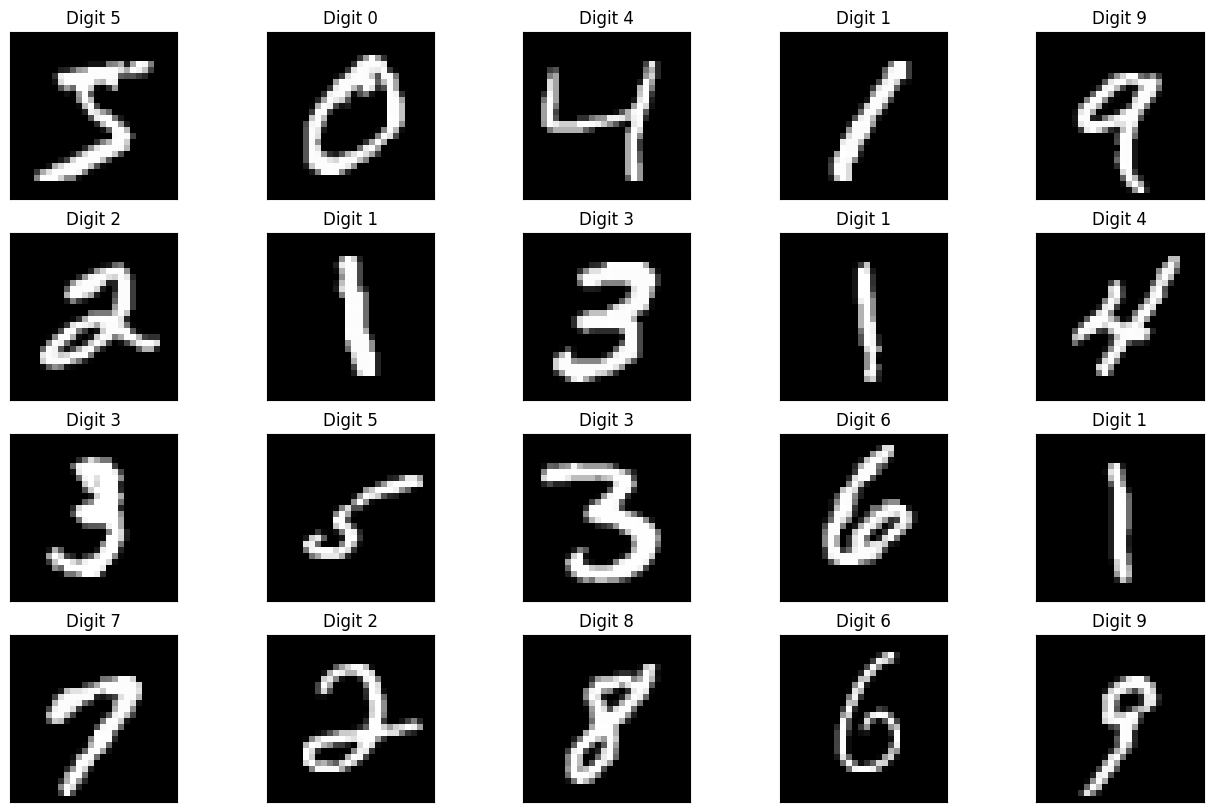

In [5]:
def plot_digit(image,digit,plt,i):             #i: An integer used to specify the position of the subplot  where the image will be displayed in a grid.
    plt.subplot(4,5,i+1)
    plt.imshow(image,cmap=plt.get_cmap("gray"))
    plt.title(f"Digit {digit}")
    plt.xticks([])
    plt.yticks([])
    
plt.figure(figsize=(16,10))
for i in range(20):
    plot_digit(X_train[i],Y_train[i],plt,i)
plt.show()

In [6]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
X_train=X_train.reshape((X_train.shape+(1,)))
X_test=X_test.reshape((X_test.shape+(1,)))

In [8]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
Y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [10]:
model=Sequential([
    Conv2D(activation="relu",filters=32,kernel_size=(3,3),input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100,activation='relu'),
    Dense(10,activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [11]:
optimizer=SGD(learning_rate=0.01)
model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [12]:
model.fit(X_train,Y_train,epochs=10,batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4568 - accuracy: 0.8769
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2240 - accuracy: 0.9348
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1713 - accuracy: 0.9493
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1396 - accuracy: 0.9586
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1183 - accuracy: 0.9650
Epoch 6/10
1875/1875 [==============================] - 1891s 1s/step - loss: 0.1029 - accuracy: 0.9694
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0925 - accuracy: 0.9724
Epoch 8/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0831 - accuracy: 0.9749
Epoch 9/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0759 - accuracy: 0.9775
Epoch 10/10
1875/1875 [==============================] - 37s 20m

1/1 [==============================] - 0s 57ms/step


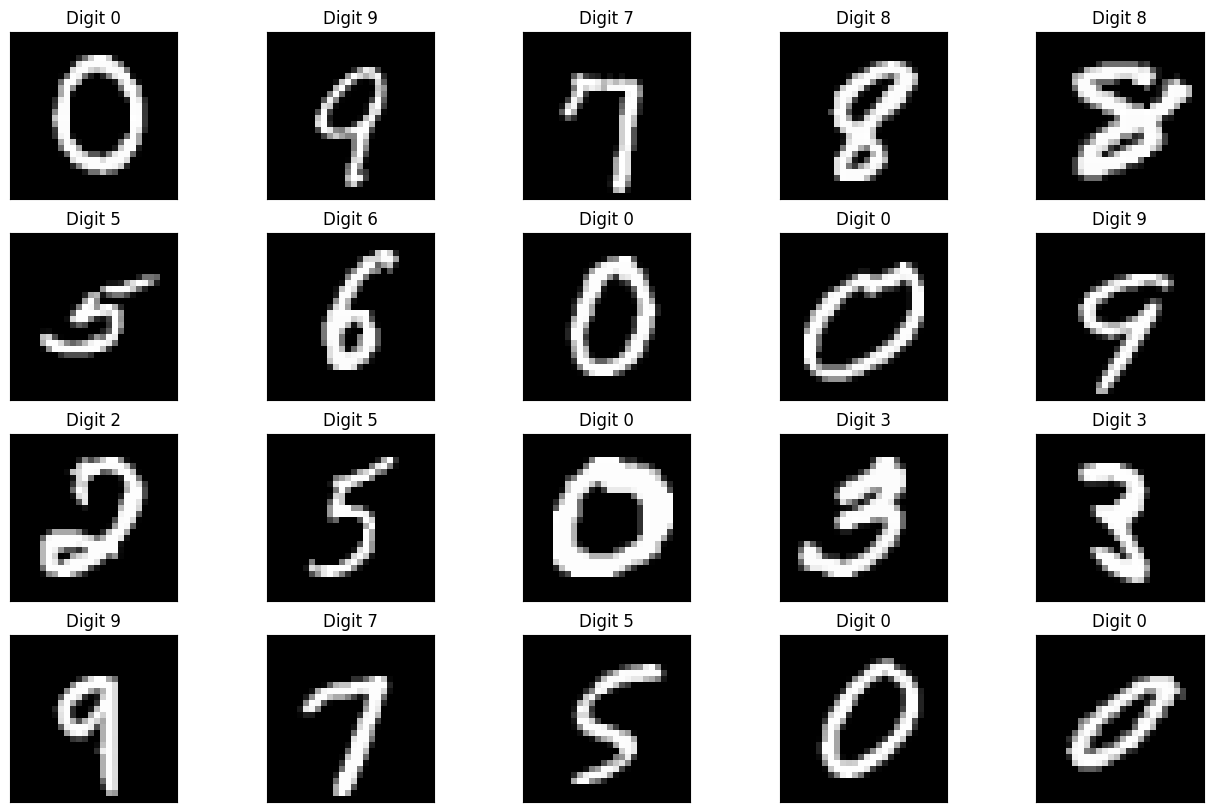

In [13]:
plt.figure(figsize=(16,10))    
for i in range(20):
    image =random.choice(X_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1,28,28,1)))[0],axis=-1)
    plot_digit(image,digit,plt,i)

plt.show()

In [14]:
predictions=np.argmax(model.predict(X_test),axis=-1)
print(predictions)

313/313 [==============================] - 3s 8ms/step
[7 2 1 ... 4 5 6]


In [15]:
accuracy_score(Y_test,predictions)

0.9743

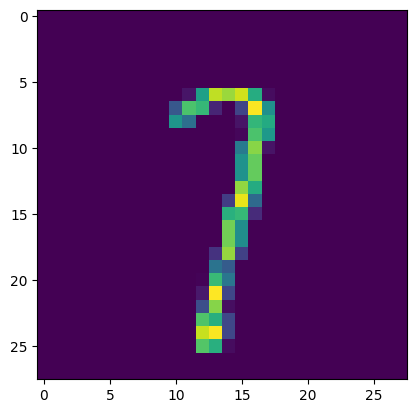

In [16]:
n=random.randint(0,9999)
plt.imshow(X_test[n])

In [17]:
predicted_value=model.predict(X_test)
print("Hand Written digit in the number= %d"%np.argmax(predicted_value[n]))

313/313 [==============================] - 3s 8ms/step
Hand Written digit in the number= 7


In [18]:
score=model.evaluate(X_test,Y_test)
print(score)

313/313 [==============================] - 3s 8ms/step - loss: 0.0809 - accuracy: 0.9743
[0.08090944588184357, 0.9743000268936157]


In [19]:
print("Loss = %.2f%%"%score[0])
print("Profit =%.2f%%"%(score[1]*100))

Loss = 0.08%
Profit =97.43%
